# Яндекс Недвижимость

## Поиск факторов, влияющих на цену объектов

Компания хочет усовершенствовать сервис Яндекс Недвижимость - автоматически определять рыночную стоимость объектов недвижимости, чтобы построить систему, отслеживающую аномалии и мошенническую деятельность. 

Над данном этапе, необходимо провести исследовательский анализ, цель которого **установить параметры, влияющие на цену объектов.**

Для анализа получены данные сервиса Яндекс Недвижимость `real_estate_data.csv` — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Исследование пройдёт в три этапа:
1. Обзор данных.
2. Предобработка данных.
3. Проверка гипотез.


### Обзор данных

In [1]:
#импортируем библиотеку pandas
import pandas as pd
#чтобы не появлялись предупреждения
import warnings
warnings.simplefilter("ignore")

In [2]:
#открываем файл и записываем в переменную data
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
#чтобы таблица с большим количеством колонок открывалась полностью
pd.set_option('display.max_columns', None)

In [4]:
#посмотрим на данные
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

в датасете 23699 строк и 22 столбца со следующими характеристиками объектов:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

В датасете есть пропуски, для некоторых столбцов логично будет изменить типы данных и немного преобразовать значения.

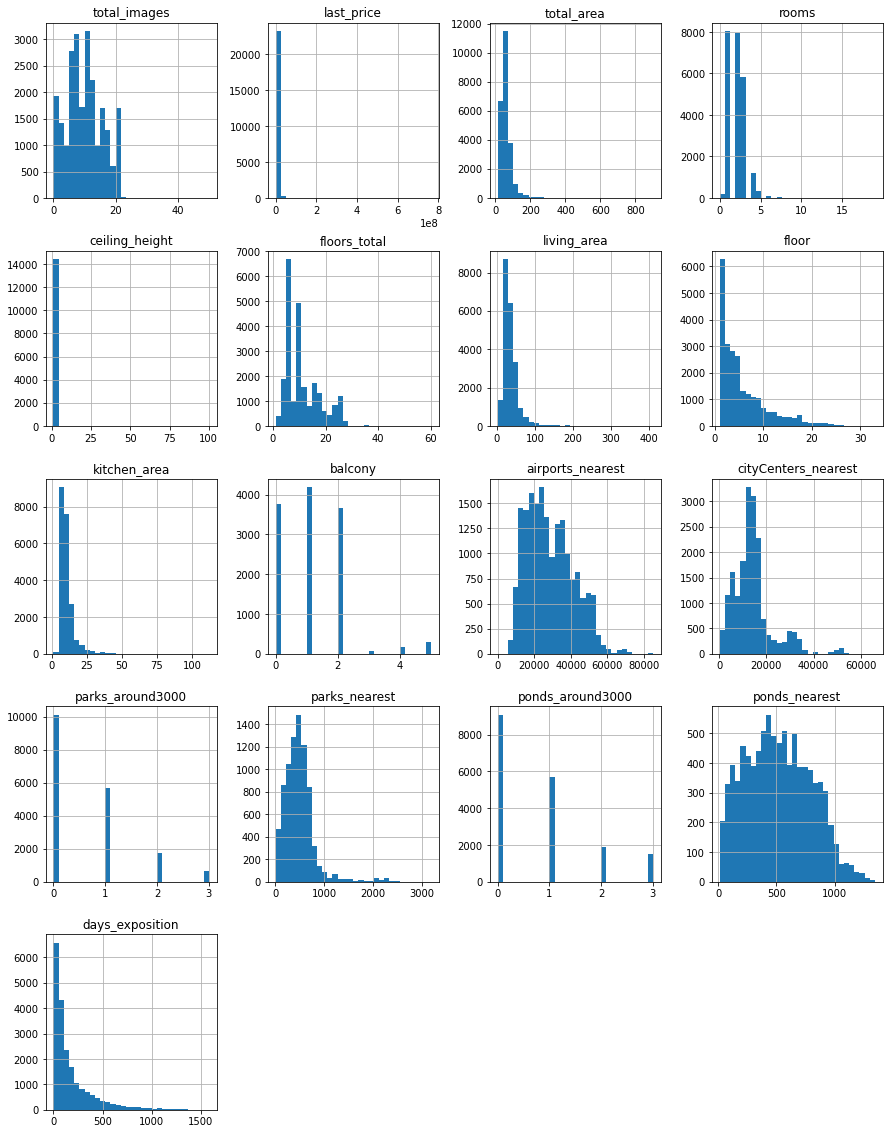

In [6]:
#визуализируем все численные данные 
data.hist(figsize=(15, 20), bins = 30);

- Количество фотографий в объявлении `total_images`в большинстве случаев меньше 20. Чаще всего 5-10 фото.
- Больше всего в датасете объявлений о продаже объектов общей площадью не более 100 кв.м. (`total_area`), с 3-мя комнатами (`rooms`).
- В основном, объекты находятся на 1-3 этажах (`floor`), в 5-10-ти этажных домах (`floors_total`).
- Количество балконов (`balcony`, 1,2 или 3) примерно одинаково распределено между объектами. есть странные варианты c 4-5-6 балконами.
- В среднем, ближайший аэропорт (`airport_nearest`) расположен примерно в 20 км от объекта.
- Большинство объектов удалены от центра на 7-20 км.
- Большинство объектов не имеют парка или водоема в радиусе 3 км. А для тех объектов, где есть, в среднем, ближайший парк и водоем расположены примерно в 500 м от объекта.

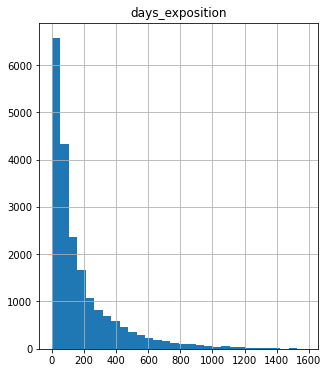

In [7]:
data.hist(column = 'days_exposition', figsize=(5, 6), bins = 30);

- В большинстве случаев, объекты продавались менее чем за 50 дней с момента размещения объявления.

Для остальных параметров пока сложно что-то сказать о распределении, нужна дополнительная обработка, т.к. для них большинство значений попадает в один столбец гистограммы.


#### Вывод
Файл с данными анализа представлен таблицей с характеритиками объектов недвижимости в объявлении. В таблице указаны данные по  23699 объектам и 22 столбца. В таблице представлены цена продажи объекта, описание объекта (добавленное пользователем) и автоматически из геосервиса, данные о размещении объявления.
14 столбцов содержат пропуски, причем некоторые очень критичное количество.

Подробнее рассмотрим качество данных в ходе их предобработки.

### Предобработка данных

#### Работа с пропусками

In [8]:
#оценим количество пропусков 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

1. Пропуски в `balcony` можем заполнить нулями, т.к. пропуски в этих данных, скорее всего, означают, что пользователь не заполнил поле по причине того, что в объекте балкон отсутсвует.

In [9]:
#заполним пропуски в столбце balcony, скорее всего пропуски - это объекты без балконов
data['balcony'] = data['balcony'].fillna(0)

2. Пропуски в `ceiling_height` вероятно возникли, т.к. пользователи пропускали поле, потому что не знали высоту потолков и решили не уточнять, т.к. это не самый важный показатель при выборе недвижимости.
Пропусков много - 9195, удалять строки не будем. Можно попробовать заменить на медианное значение.

In [10]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

3. В `is_apartment` большинство пропусков. Можно подумать, что если пользователь не заполнял поле, то значит объект не является апартаментами. Тогда получается, что из более 23000 объектов только 50 апартаментов. Неправдоподобно. Не будет заменять пропуски на False. Оставим пропуски незаполненными.

In [11]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

4. Отсутствие большого количества данных в столбцах `parks_nearest` , `ponds_nearest` настораживает. Эти данные были добавлены в систему алгоритмами сервиса. Большое число пропусков (15000!!) может быть связано со сбоем в передаче геоданных.При этом пропусков в столбцах `parks_around3000` , `ponds_around3000` в 3 раза меньше. В этих колонках отсутсвие информации может быть связано с проблемой передачи геоданных.
**Скорее всего, придется обойтись без этих значений при исследовании данных.**

5. Там, где количество пропусков в столбцах минимально, удалим строки. Это применимо к столбцам `locality_name`, `floors_total`.

In [12]:
data = data.dropna(subset=['locality_name', 'floors_total'])

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

7. Чем имеет смысл заполнить пропуски в колонках `airports_nearest`, `days_exposition` не ясно. Т.к. например в Питере расстояние от аэропорта примерно с равной частотой может составлять от 10 до 40 км. 

#### Работа с дубликатами

In [14]:
#проверка на явные дубликаты строк
data.duplicated().sum()

0

In [15]:
#посмотрим, есть ли неявные дубликаты в 'locality_name'
data['locality_name'].nunique()

364

In [16]:
#уберем наиболее заметные неявные дубликаты
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'городской поселок'], 'поселок', regex=True)
    .replace(['поселок '], '', regex=True)
) 

In [17]:
data['locality_name'].nunique()

320

Удалили 44 неявных дубликата в `locality_name'.

#### Работа с пропусками (продолжение)

Строки с пропусками в `living_area` , `kitchen_area`, `cityCenters_nearest`  можно попробовать заполнить медианами по населенным пунктам. Однако впоследствии это вызывает артефакт на диаграммах рассеяния (получаем одинаковые по площади, но сильно различающиеся по стоимости объекты). Поэтому все же не будем их заменять и проигнорируем.

In [18]:
#for t in data['locality_name'].unique():
    #data.loc[(data['locality_name'] == t) & (data['living_area'].isna()), 'living_area'] = \
    #data.loc[(data['locality_name'] == t), 'living_area'].median()

#for t in data['locality_name'].unique():
    #data.loc[(data['locality_name'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    #data.loc[(data['locality_name'] == t), 'kitchen_area'].median()

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [20]:
#оценим долю оставшихся строк
old_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.shape[0]/old_data.shape[0]

0.994345752985358

Таким образом, удалили минимальное количество данных. Где было логично, что пропуски означают 0/отсутствие (в колонке `balcony`) - заполнили пропуски нулями. Пропуски по высоте потолков заполнили общим медианным значением, т.к. признак в целом несильно варьируется. 
Остальные пропуски пришлось оставить, т.к. если их удалить , потеряем большое количество данных.

#### Изменение типов данных

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Изменим тип данных `first_day_exposition` на datetime, т.к. при использовании этого столбца значения должны воприниматься как даты.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Тип  `floors_total`, `balcony` изменим на int. Так как величины дискретные и не могут быть дробными.

In [23]:
for column in ['floors_total', 'balcony']:
    data[column] = data[column].astype('int64')

#### Добавим вспомогательные колонки

1. цена одного квадратного метра `meter_price`;

In [24]:
data['meter_price'] = (data['last_price']/data['total_area']).round(2)

2. день недели публикации объявления `weekday`;

In [25]:
data['weekday'] = data['first_day_exposition'].dt.weekday

3. месяц публикации объявления `month_exp`;

In [26]:
data['month_exp'] = data['first_day_exposition'].dt.month

In [27]:
data['month_exp']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_exp, Length: 23565, dtype: int64

4. год публикации объявления `year_exp`;

In [28]:
data['year_exp'] = data['first_day_exposition'].dt.year

In [29]:
data['year_exp']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_exp, Length: 23565, dtype: int64

5. тип этажа квартиры `floor_type`;

In [30]:
#создадим функцию для строки 
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor ==  floors_total:
        return 'последний'
    else:
        return 'другой'    

In [31]:
data['floor_type'] = data.apply(floor_type, axis = 1)

In [32]:
data['floor_type'].value_counts()

другой       17326
последний     3330
первый        2909
Name: floor_type, dtype: int64

6. Расстояние до центра города в километрах `cityCenters_nearest_km`

In [33]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round(0)

In [34]:
data['cityCenters_nearest_km']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest_km, Length: 23565, dtype: float64

#### Вывод

*Пропуски.*

Пропусков в датасете очень много. Где было логично, что пропуски означают 0/отсутствие (в колонке `balcony`) - заполнили пропуски нулями. Пропуски по высоте потолков заполнили общим медианным значением, т.к. признак в целом несильно варьируется.
Остальные пропуски пришлось оставить, т.к. не нашлось чем их заменить, а  если их удалить , потеряем большое количество данных.
Из-за того, что в колонках `is_apartment`, `parks_nearest`, `ponds_nearest` преобладают пропуски, придется исключить их из дальнейшего анализа.

Причина пропусков в колонках `balcony`, `is_apartment`, `living_area` , `kitchen_area`, `ceiling_height` и некоторых других возникли из-за игнорирования пользователем соотвествующего поля при расмещении объявления. Можно рекомендовать не разрешать публикацию, пока эти поля не заполнены, тогда получится собрать больше данных.

Причиной пропусков в колонках, связанных с расположением тех или иных объектов относительно продаваемого объекта недвижимости, скорее всего, является некорректная работа геосервиса на этапе сбора или передачи информации в Яндекс.Недвижимость. Разработчикам следует проверить корректно ли работают алгоритмы.

*Дубликаты.*

Явных дубликатов в датасете нет. Неявные дубликаты в столбце с названиями населенных пунктов после ручного поиска убрали, заменив одним универсальным именем.

*Типы данных.*

Преобразовали в datetime даты размещения объявлений, т.к. дальше будем работать с этим с толбцом и нужно, чтоб работали соовествующие методы pandas для дат.
Число балконов и этажей в доме преобразовали в целочисленный тип, т.к. эти велечины дискретны.

*Вспомогательные колонки.*

Было добавлено шесть вспомогательных колонок для решения дальнейших задач исследования: цена одного квадратного метра `meter_price`, день недели публикации объявления `weekday`, месяц публикации объявления `month_exp`, год публикации объявления `year_exp`, тип этажа объекта `floor_type`, расстояние до центра города в километрах `cityCenters_nearest_km`.


### Исследовательский анализ данных

#### Удаление аномалий и выбросов

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,weekday,month_exp,year_exp,cityCenters_nearest_km
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,14.186504
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,8.621131
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


Выделим список наиболее важных для анализа параметров:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка
- расстояние до аэропорта
- цена объекта.

Рассмотрим распределение каждого параметра отдельно. В случае наличия аномальных значений, обработаем их или удалим.

- общая площадь

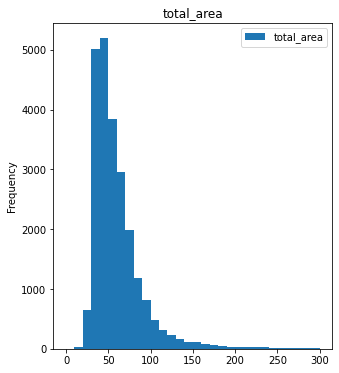

In [36]:
data.plot(kind='hist', y = 'total_area', bins=30, range = (0,300), figsize = (5,6), title = 'total_area');

Для общей площади выбросов нет. Уберем очень высокие значения.

In [37]:
data = data.query('total_area<200')

- жилая площадь

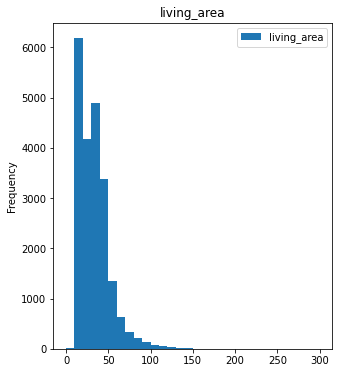

In [38]:
data.plot(kind='hist', y = 'living_area', bins=30, range = (0,300), figsize = (5,6), title = 'living_area');

Для жилой площади выбросов нет. 

- площадь кухни

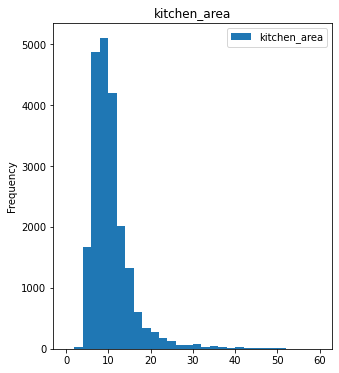

In [39]:
data.plot(kind='hist', y = 'kitchen_area', bins=30, range = (0,60), figsize = (5,6), title = 'kitchen_area');

Для площади кухни значения закономерны, выбросов нет. 

- стоимость

In [40]:
#для наглядности разделим значения стоимости объектов на 1млн
data['last_price'] = data['last_price']/1000000

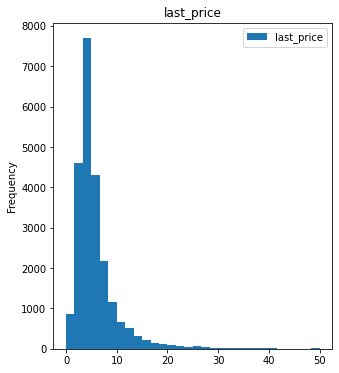

In [41]:
#выведем гистрограмму
data.plot(kind='hist', y = 'last_price', bins=30, range = (0, 50), figsize = (5,6), title = 'last_price');

Для стоимости объекта значения закономерны, выбросов нет. Наиболее встречаемая стоимость объектов лежит в интервало от 3 млн до 10 млн. Вполне похоже на правду. Уберем высокие значения - выше зо млн.

In [42]:
data = data.query('last_price <= 30')

- количество комнат

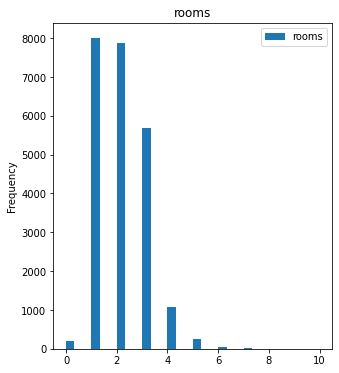

In [43]:
data.plot(kind='hist', y = 'rooms', bins=30, range = (0, 10), figsize = (5,6), title = 'rooms');

Стоит убрать объекты с числом комнат больше 5 и равные нулю.

In [44]:
data = data.query('0<rooms<=5')

- высота потолка

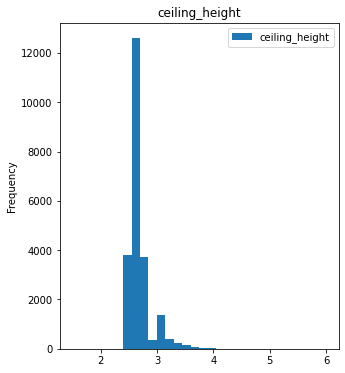

In [45]:
data.plot(kind='hist', y = 'ceiling_height', bins=30, range = (1.5, 6), figsize = (5,6), title = 'ceiling_height');

Значительный пик на медианных значениях, т.к. заменили им пропуски.

In [46]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.61,   3.2 ,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.3 ,   2.71,
         4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,   3.5 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   2.87,   2.66,   2.59,   2.  ,   2.45,   3.6 ,
         2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,
         2.53,   2.74,   2.96,   2.46,   5.  ,   2.79,   2.95,   4.06,
         2.94,   3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,   3.65,
         3.18,   3.35,   2.3 ,   2.48,   2.62,   3.57,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.75,   2.88,   3.67,   3.66,   4.19,
         3.95,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,  32.  ,   3.68,
         3.07,   3.37,   3.09,   8.  ,   3.16,   3.26,   3.34,   2.81,
         3.44,   2.97,   4.37,   2.68,   3.9 ,   3.27,   4.1 ,   2.93,
      

Есть значения высоты потолков больше 10 м - 25,27,24 и тд. Скорее всего тут допущена опечатка, эти значения должны быть уменьшены в 10 раз.

In [47]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height']/10)

In [48]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.61,  3.2 ,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.3 ,  2.71,  4.  ,  2.47,  2.73,
        2.84,  3.1 ,  2.34,  3.4 ,  3.5 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,  2.  ,
        2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,  3.62,
        3.12,  2.53,  2.74,  2.96,  2.46,  5.  ,  2.79,  2.95,  4.06,
        2.94,  3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,  3.18,
        3.35,  2.3 ,  2.48,  2.62,  3.57,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.75,  2.88,  3.67,  3.66,  4.19,  3.95,  3.24,  4.8 ,
        4.5 ,  4.2 ,  3.36,  3.68,  3.07,  3.37,  3.09,  8.  ,  3.16,
        3.26,  3.34,  2.81,  3.44,  2.97,  4.37,  2.68,  3.9 ,  3.27,
        4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.14,  3.32,  1.2 ,
        8.3 ,  2.98,  2.86,  3.08,  3.17,  3.28,  3.04,  3.84,  3.23,
        3.02,  3.21,

Уберем высокие значения.

In [49]:
data = data.query('ceiling_height<=3.7')

- тип этажа

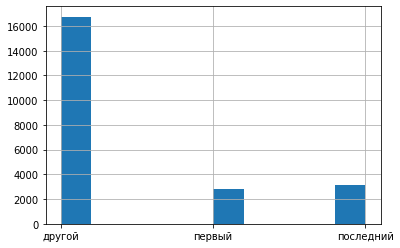

In [50]:
data['floor_type'].hist();

Распределение по этажам вполне реально - частота встречаемости объектов не на первом и не на последнем этаже выше. 

- число этажей в доме, где находится объект

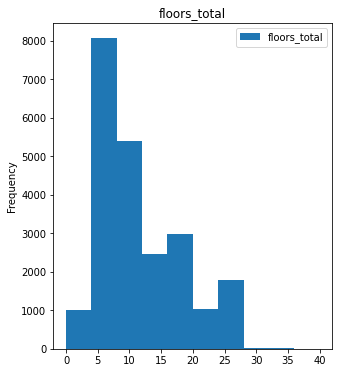

In [51]:
data.plot(kind='hist', y = 'floors_total', range = (0,40),figsize = (5,6), title = 'floors_total');

Такое распределение этажей в домах, где расположен объект, выглядит правдоподобно. По-видимому, больше всего продают объекты в домах старой, относительно малоэтажной застройки.

- расстояние до центра города

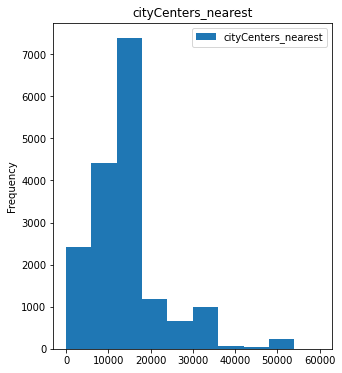

In [52]:
data.plot(kind='hist', y = 'cityCenters_nearest', range = (0,60000),figsize = (5,6), title = 'cityCenters_nearest');

В целом, правдоподобное распределение. 

- расстояние до ближайшего парка

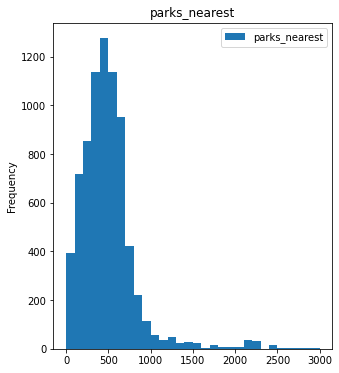

In [53]:
data.plot(kind='hist', y = 'parks_nearest', range = (0,3000), bins = 30,figsize = (5,6), title = 'parks_nearest');

В целом, правдоподобное распределение.

- расстояние до ближайшего аэропорта

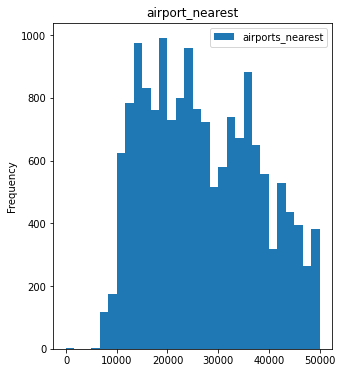

In [54]:
data.plot(kind='hist', y = 'airports_nearest', range = (0,50000), bins = 30,figsize = (5,6), title = 'airport_nearest');

В целом, правдоподобное распределение.

- по годам

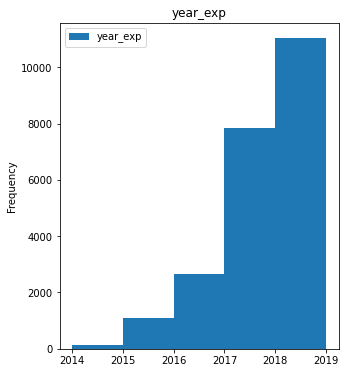

In [55]:
data.plot(kind='hist', y = 'year_exp', bins = 5,figsize = (5,6), title = 'year_exp');

С каждым годом количество публикуемых объявлений на сервисе росло.

- по месяцам

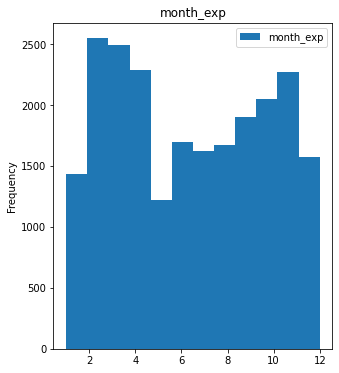

In [56]:
data.plot(kind='hist', y = 'month_exp', bins = 12,figsize = (5,6), title = 'month_exp');

Распределение выглядит реалистичным. В мае,январе и декабре публиковали меньше всего объявлений.

- по дням

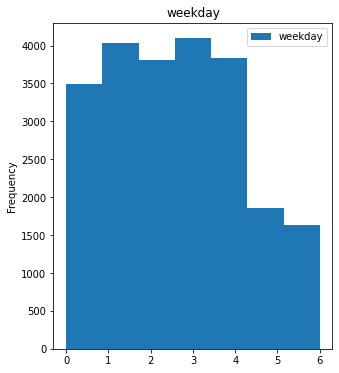

In [57]:
data.plot(kind='hist', y = 'weekday', bins = 7,figsize = (5,6), title = 'weekday');

В выходные добавляют меньше объявлений, чем в будние дни.

In [58]:
#оценим долю оставшихся строк
old_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.shape[0]/old_data.shape[0]

0.9605890543904806

**Микровывод**

В распределении большинства параметров все хорошо.

Убрали редкие и высокие значения общей площади, стоимости объектов.

Убрали объекты, которых было указано более 5 комнат, и объекты где, количество комнат равно 0.

Убрали аномально высокие значения высоты потолков. Скорее всего , там была ошибка, пропущен разделитель в дроби (24, а не 2.4), так преобразовали значения выше 10.

Итого, исключили из анализа 4% данных.


#### Изучим `days_exposition`

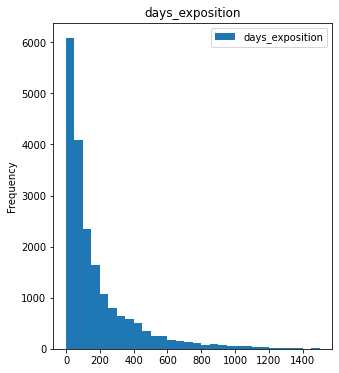

In [59]:
data.plot(kind='hist', y = 'days_exposition', range = (0,1500), bins = 30,figsize = (5,6), title = 'days_exposition');

In [60]:
data['days_exposition'].mean()

178.83345141700406

In [61]:
data['days_exposition'].median()

95.0

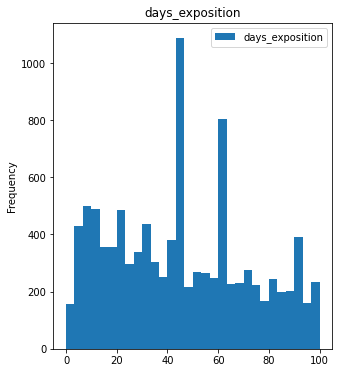

In [62]:
data.plot(kind='hist', y = 'days_exposition', range = (0,100), bins = 30,figsize = (5,6), title = 'days_exposition');

**Микровывод**

Большинство объектов были проданы относительно быстро. Медиана составила 95 суток, а среднее 178 суток.Среднее увеличено относительно медианы,  в связи с наличием редких, но больших по значению величин. 
Можем обозначить быстрыми те продажи,на которые ушло менее 50 суток. А необычно долгими те, на которые ушло более 600 дней.

#### Влияние факторов на стоимость объектов

Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

1. общая площадь

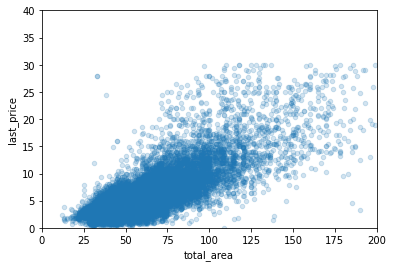

In [63]:
data.plot(kind ='scatter', x = 'total_area', y = 'last_price', xlim = (0,200), ylim = (0,40), alpha = 0.2);

Зависимость стоимости объекта от общей площади определенно есть. Чем больше площадь, тем больше стоимость. Дополнительно подтвердим это, получив коэффициент корреляции.

In [64]:
data['total_area'].corr(data['last_price'])

0.7818250641090199

Корреляция не очень высока, что может быть связано  с влиянием других факторов.

2. жилая площадь

По идее, тут картина будет похожа на предыдущую , потому что общая и жилая площадь хорошо коррелируют.

In [65]:
data['total_area'].corr(data['living_area'])

0.920419568604086

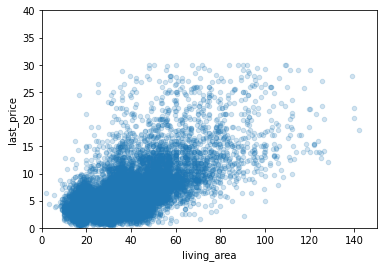

In [66]:
data.plot(kind ='scatter', x = 'living_area', y = 'last_price', xlim = (0,150), ylim = (0,40), alpha=0.2);

Как я и предполагала между стоимостью и жилой площадью объекта есть прямая зависимость.

3. Площадь кухни

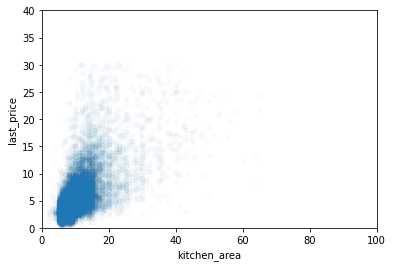

In [67]:
data.plot(kind ='scatter', x = 'kitchen_area', y = 'last_price', xlim = (0,100), ylim = (0,40), alpha=0.02);

Здесь уже сложно увидеть хорошую зависимость. Вроде бы есть положительная корреляция, но уже менее яркая.

In [68]:
data['kitchen_area'].corr(data['last_price'])

0.6001108099741427

4. Количество комнат

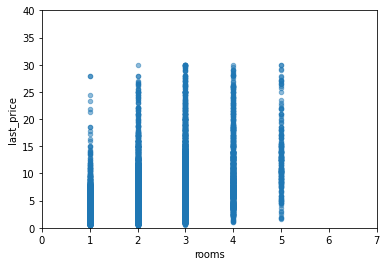

In [69]:
data.plot(kind ='scatter', x = 'rooms', y = 'last_price', xlim = (0,7), ylim = (0,40),alpha= 0.5);

In [70]:
data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')

,last_price
rooms,
1,3.60
2,4.75
3,6.10
4,8.50
5,12.00


Есть некоторая зависимость: чем больше комнат в объекте, тем выше может быть цена у объекта. На графике это особенно просматривается в случае 1-2-3 комнат.

5. Этаж объекта

Рассмотрим по категориям - первый, последний, другой.

In [71]:
data.pivot_table(index = 'floor_type', values = 'last_price', aggfunc = 'median')

,last_price
floor_type,
другой,4.8
первый,3.9
последний,4.2


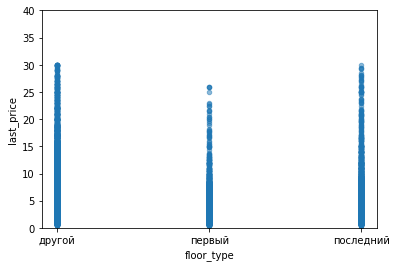

In [72]:
data.plot(kind ='scatter', x = 'floor_type', y = 'last_price', ylim = (0,40),alpha= 0.5);

Объект на первом или последнем этаже зачастую дешевле, чем на любом другом.

6. Дата размещения объявления

- год

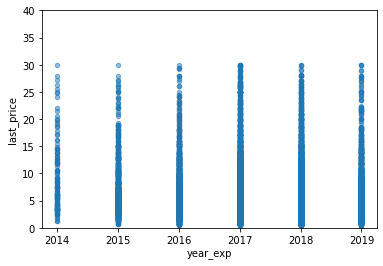

In [73]:
data.plot(kind ='scatter', x = 'year_exp', y = 'last_price',ylim = (0,40),alpha= 0.5);

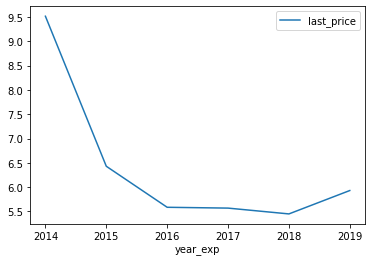

In [74]:
data.pivot_table(index = 'year_exp', values = 'last_price', aggfunc = 'mean').plot(y ='last_price');

Прослеживается зависимость, что недвижимость дешевела с 2014 по 2018 гг. Затем стоимость объектов слегка выросла в 2019 г..

- месяц

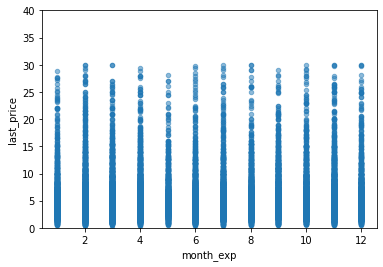

In [75]:
data.plot(kind ='scatter', x = 'month_exp', y = 'last_price', ylim = (0,40),alpha= 0.5);

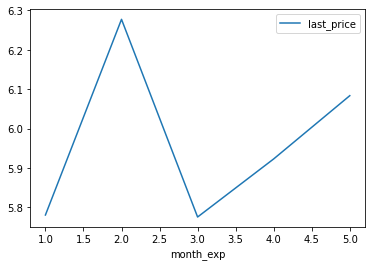

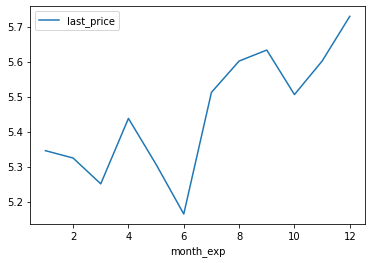

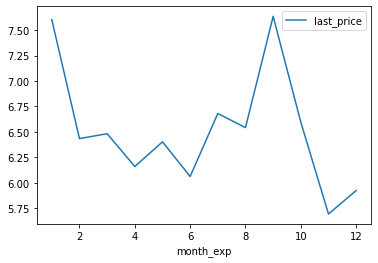

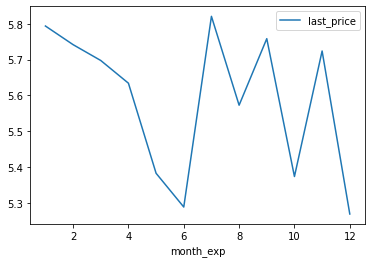

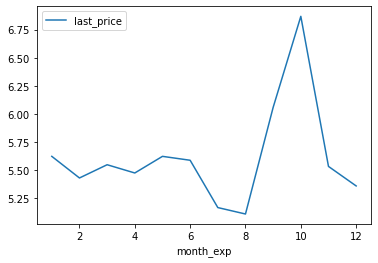

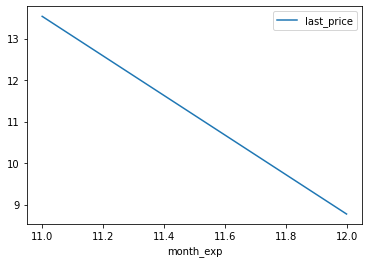

In [76]:
for year in data['year_exp'].unique():
    data.query('year_exp == @year').pivot_table(index = 'month_exp', values = 'last_price', aggfunc = 'mean').plot(y ='last_price')

В разные годы была разная зависимость стоимости объекта от месяца , когла было размещено объявления. Поэтому нельзя сказать что-то конкретное о зависимости стоимости от месяца в целом. 

- день

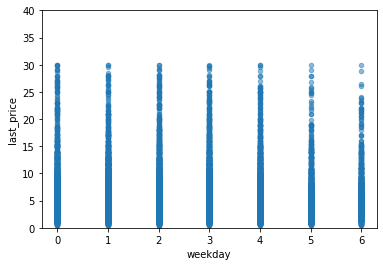

In [77]:
data.plot(kind ='scatter', x = 'weekday', y = 'last_price', ylim = (0,40),alpha= 0.5);

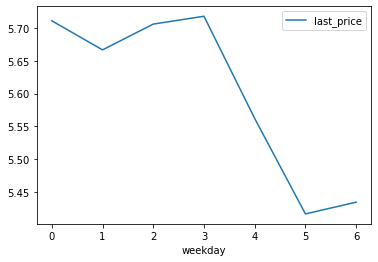

In [78]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'mean').plot(y ='last_price');

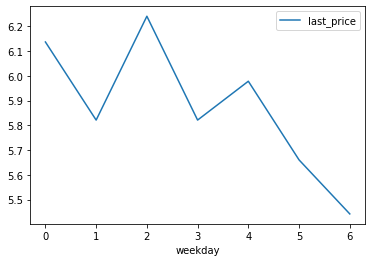

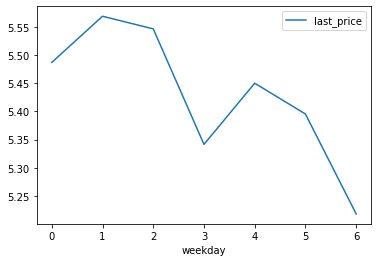

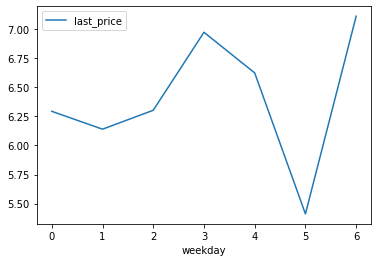

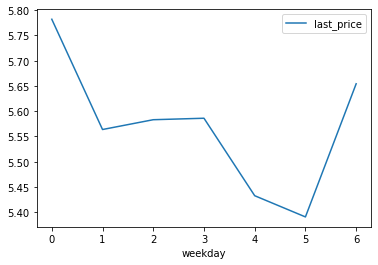

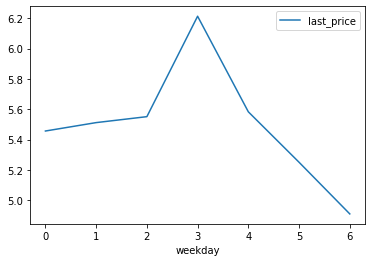

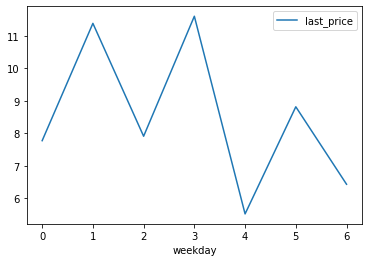

In [79]:
for year in data['year_exp'].unique():
    data.query('year_exp == @year').pivot_table(index = 'weekday', values = 'last_price', aggfunc = 'mean').plot(y ='last_price')

Аналогично завивимости цены от месяца, нет общей повторяющейся из года в год зависимости цены объекта от дня выставления объявления.  Но можно заметить, что цена объекта, размещенного в сервисе в воскресенье, практически всегда ниже, чем в остальные дни.

**Микровывод**

Положительно на стоимость объекта влияет (чем больше признак, тем больше стоимость) общая и жилая площадь объекта - здесь наблюдается яркая положительная корреляция. Площадь объекта основной показатель, влияющий на стоимость.

Площадь кухни также положительно коррелирует с ценой, но зависимость слабее.

Количество комнат прямо пропорционально цене объекта. Это тоже основной показатель. В целом, он обычно тоже связан с площадью объекта.

В среднем, первый этаж самый дешевый.

Что касается времени, объекте дешевели с 2014 года, а в 2019 г стали немного дорожать. По месяцам и дням сложно проследить глобальные зависимости, из года в год тенденции менялись.








#### Cредняя цена одного квадратного метра.

Посчитаем среднюю цену кв метра в 10 населённых пунктах с наибольшим числом объявлений.


In [80]:
temp =data.copy()
def que(category):
    data_temp = temp.pivot_table(index='locality_name', values=category, aggfunc =['count', 'mean'])
    data_temp.columns = ['count', 'mean']
    data_temp = data_temp.sort_values(by='count', ascending =False)
    display(data_temp.head(10).style.format("{:.3f}").background_gradient(cmap='RdPu', axis=0))

In [81]:
stat_price_meter= que('meter_price')
stat_price_meter

,count,mean
locality_name,,
Санкт-Петербург,14974.000,110434.517
Мурино,559.000,85469.355
Шушары,434.000,78254.498
Всеволожск,390.000,68513.922
Пушкин,358.000,102685.468
Колпино,337.000,75333.296
Парголово,322.000,90448.423
Гатчина,306.000,68799.628
деревня Кудрово,283.000,92297.219


**Микровывод**

Самым дорогим населенным пунктом является Санкт-Петербург, что понятно, так как это крупный город, где есть много работы, инфраструктрура, места досуга и т.д. 

Дешевле всего недвижимость в Выборге. Видимо, это место менее привлекательны для желающих приобрести недвижимость. Возможно, потому что Выборг находится от Санкт-Петербурга дальше, чем другие населенные пункты.

#### Средняя цена каждого километра от центра города. 

Расмотрим объекты в Питере и выясним как их стоимость зависит от расстояния до центра города.


,средняя цена
cityCenters_nearest_km,
0.0,11.315833
1.0,11.276078
2.0,10.551897
3.0,9.508131
4.0,10.045300
5.0,10.517445
6.0,9.399240
7.0,9.289020
8.0,8.777053


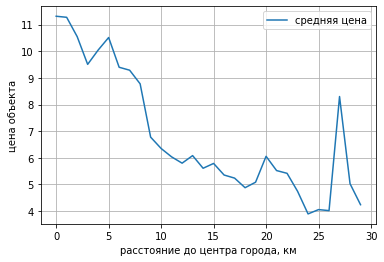

In [82]:
data_spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc =['mean'])
data_spb.columns = ['средняя цена']
data_spb.plot(y = 'средняя цена', grid = True, xlabel = 'расстояние до центра города, км', ylabel = 'цена объекта')
data_spb


**Микровывод**

Стоимость объектов резко снижается при удалении из самого центра города к 10 км от центра.
Далее также прослеживается снижение стоимости при удалении от центра, но менее резко.

Есть некоторые промежуточные пики на графике, показывающие локальное повышение стоимости объектов. Например, 27 км от центра может быть расположен какой-то жк бизнес класса или что-то наподобие Рублевки в Москве. 

Но в целом, чем дальше от центра Санкт-Петербурга, тем дешевле объект.

#### Вывод

1. В распределении большинства параметров все хорошо. Убрали редкие и высокие или нелогичные значения в некоторых столбцах.
2. Согласно распределению времени нахождения объявления на сайте,в большинстве случаев в течение 100 дней объекты продают. К быстрым продажам отнесли те, что осуществлялись быстрее 50 суток, а необычно долгие - 600 суток.
3. Основное влияние на стоимость объекта оказывают общая и жидая площадь, количество комнат. Чем больше эти параметры, тем дороже объект. Первый этаж самый дешевый относительно остальных.
4. Самым дорогим населенным пунктом в выборке является Санкт-Петербург. А дешевле всего недвижимость в Выборге.
5. Чем дальше от центра Санкт-Петербурга находится объект, тем он дешевле.



## Общий вывод

*1. Обзор данных*

Файл с данными анализа представлен таблицей с характеритиками объектов недвижимости в объявлении. В таблице указаны данные по 23699 объектам и 22 столбца. В таблице представлены цена продажи объекта, описание объекта (добавленное пользователем и автоматически из геосервиса), данные о размещении объявления. 14 столбцов содержат пропуски, причем некоторые очень критичное количество.


*2. Предобработка*

Пропусков в датасете очень много. Где было логично, что пропуски означают 0/отсутствие (в колонке `balcony`) - заполнили пропуски нулями. Пропуски по высоте потолков заполнили общим медианным значением, т.к. признак в целом несильно варьируется. Остальные пропуски пришлось оставить, т.к. не нашлось чем их заменить, а  если их удалить , потеряем большое количество данных. Из-за того, что в колонках `is_apartment`, `parks_nearest`, `ponds_nearest` преобладают пропуски, придется исключить их из дальнейшего анализа.
Причина пропусков в колонках `balcony`, `is_apartment`, `living_area` , `kitchen_area`, `ceiling_height` и некоторых других возникли из-за игнорирования пользователем соотвествующего поля при расмещении объявления. Можно рекомендовать не разрешать публикацию, пока эти поля не заполнены, тогда получится собрать больше данных.

Причиной пропусков в колонках, связанных с расположением тех или иных объектов относительно продаваемого объекта недвижимости, скорее всего, является некорректная работа геосервиса на этапе сбора или передачи информации в Яндекс.Недвижимость. Разработчикам следует проверить корректно ли работают алгоритмы.

Явных дубликатов в датасете нет. Неявные дубликаты в столбце с названиями населенных пунктов после ручного поиска убрали, заменив одним универсальным именем.
Преобразовали в datetime даты размещения объявлений, т.к. дальше будем работать с этим с толбцом и нужно, чтоб работали соовествующие методы pandas для дат.
Число балконов и этажей в доме преобразовали в целочисленный тип, т.к. эти велечины дискретны.


Было добавлено шесть вспомогательных колонок для решения дальнейших задач исследования: цена одного квадратного метра `meter_price`, день недели публикации объявления `weekday`, месяц публикации объявления `month_exp`, год публикации объявления `year_exp`, тип этажа объекта `floor_type`, расстояние до центра города в километрах `cityCenters_nearest_km`.

*3. Собственно исследование*

В ходе исследовательского анализа были более детально изучены данные по каждому представленному параметру. Где необходимо, были исключены аномальные и редкие значения для последующего более достоверного анализа. Было проверено, как влияют различные параметры объектов недвижимости на их стоимость, и установлено следующее:

- Согласно распределению времени нахождения объявления на сайте,в большинстве случаев в течение примерно 100 дней объекты продают. К быстрым продажам можно отнести те, что осуществлялись быстрее 50 суток, а необычно долгие - более 600 суток.
    
- Основное влияние на стоимость объекта оказывают **общая и жилая площадь, количество комнат**. Чем больше эти параметры, тем дороже объект. **Первый этаж** самый дешевый относительно остальных. Площадь кухни меньше влияет на стоимость. Общую зависимость стоимости от дня недели и месяца проследить не удалось, т.к. каждый год зависимость разная.
    
- Самым дорогим населенным пунктом в выборке является **Санкт-Петербург**, ведь это крупный город, в котором много всяческих возможностей (работа, отдых и тд). А дешевле всего недвижимость в **Выборге**, который по-видимому не очень привлекателен для покупателей из-за удаленности от Санкт-Петербурга.
    
- **Чем дальше от центра** Санкт-Петербурга находится объект, **тем он дешевле**. Логично, ведь чем дальше от центра, тем, например, дольше добираться до работы, тем хуже инфраструктура, меньше торговых центров и тд.


Таким образом, стоимость объектов увеличивается при:
- увеличении общей и жилой площади, 
- увеличении количества комнат, 
- если недвижимость находится в крупном городе-мегаполисе,
- при уменьшении расстояния до центра города,
- если объект находится не на первом этаже.
